In [2]:
import pandas as pd

In [385]:
df = df = pd.read_csv('titanic-passengers.csv', header='infer', sep=";")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


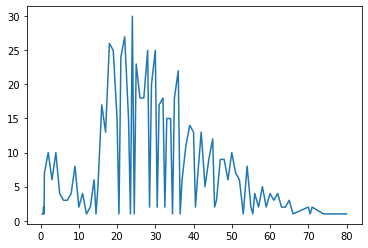

In [387]:
import matplotlib.pyplot as plt
y = df["Age"].value_counts()
plt.plot(y.sort_index(ascending=False))

In [388]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [389]:
df["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [390]:
df["Embarked"].fillna("S", inplace=True)

In [391]:
df.drop(["Cabin"], axis=1, inplace=True, errors="ignore")

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [393]:
##################"2"###################

In [394]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


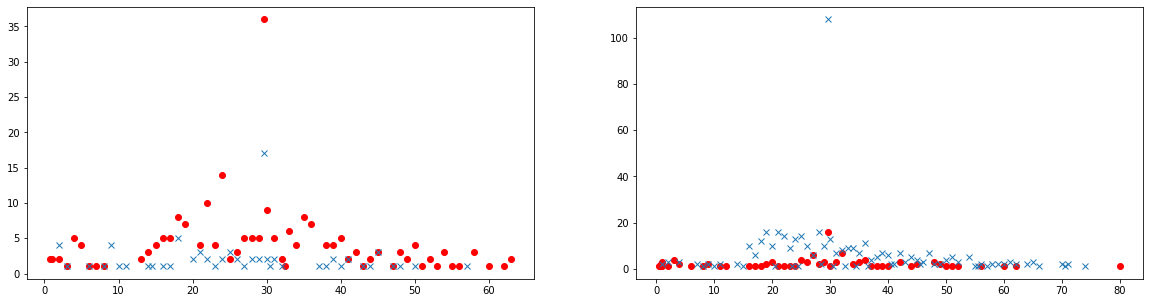

<Figure size 1200x560 with 0 Axes>

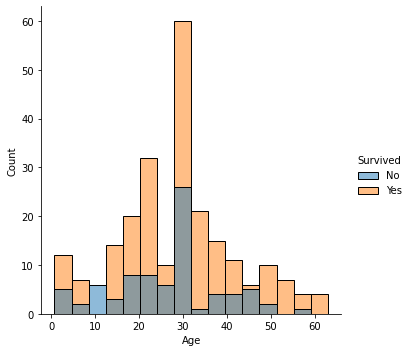

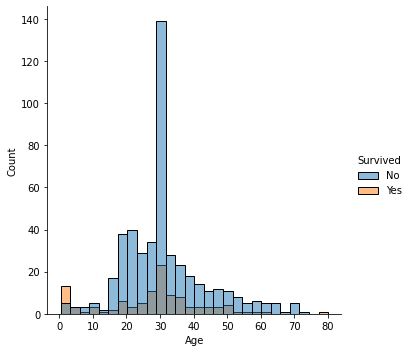

In [395]:
mask0 = df["Sex"] == "female"
mask1 = df["Sex"] == "male"
mask2 = df["Survived"] == "Yes"
mask3 = df["Survived"] == "No"

fig,ax= plt.subplots(1,2, figsize=(20, 5))
plt.figure(figsize=(15,7), dpi= 80)
ax[0].plot(df[mask0 & mask2]["Age"].value_counts(), 'ro')
ax[0].plot(df[mask0 & mask3]["Age"].value_counts(), 'x')

ax[1].plot(df[mask1 & mask2]["Age"].value_counts(), 'ro')
ax[1].plot(df[mask1 & mask3]["Age"].value_counts(), 'x')

import seaborn as sns
sns.displot(df[mask0], x="Age", hue="Survived")
sns.displot(df[mask1], x="Age", hue="Survived")

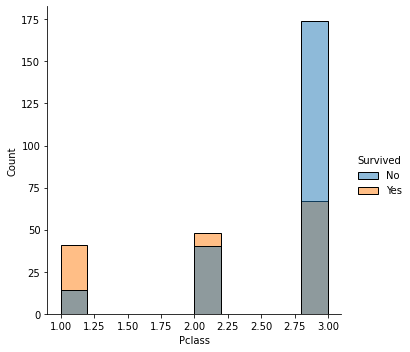

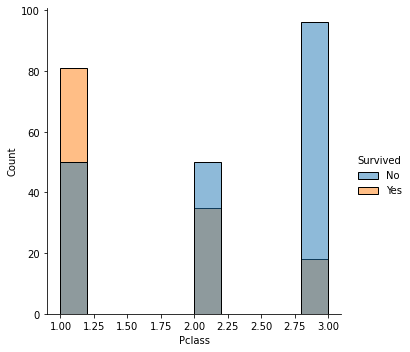

In [396]:
mask0 = df["Age"] < df["Age"].mean()
mask1 = df["Age"] > df["Age"].mean()

sns.displot(df[mask0], x="Pclass", hue="Survived")
sns.displot(df[mask1], x="Pclass", hue="Survived")

In [397]:
#we conclude that young people with high class has most likely survived compared to older people 

In [398]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000


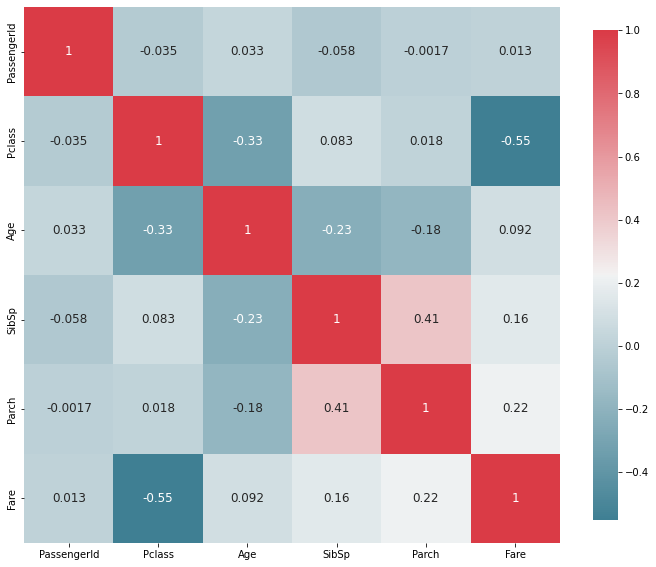

In [399]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [400]:
#as observed, the function plots the correlation of the dataset attributes in a heatmap graph using seaborn library
#correlation represents the way two attributes are changing in the dataset.

In [401]:
cf = df.copy()
cf["Survived"] = cf["Survived"].replace("Yes",1)
cf["Survived"] = cf["Survived"].replace("No",0)
cf.groupby("Pclass").mean()
##The Highest class people has most likely survived than the lower classes


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


In [402]:
cf["Title"] = df["Name"].str.split(", ").str[1].str.split(".").str[0]
#df.drop(["Name"], axis=1, inplace=True, errors="ignore")
cf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mr


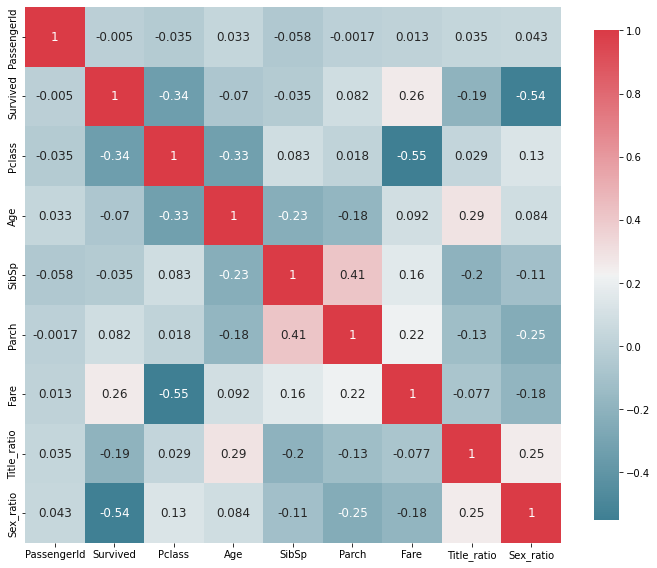

In [403]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cf["Title_ratio"]= encoder.fit_transform(cf["Title"])
cf["Sex_ratio"]= encoder.fit_transform(cf["Sex"])

plot_correlation_map(cf)

In [404]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

cf = cf.replace({"Title" : Title_Dictionary})
cf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Title_ratio,Sex_ratio
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs,11,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs,11,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs,11,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs,12,0
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,11,1


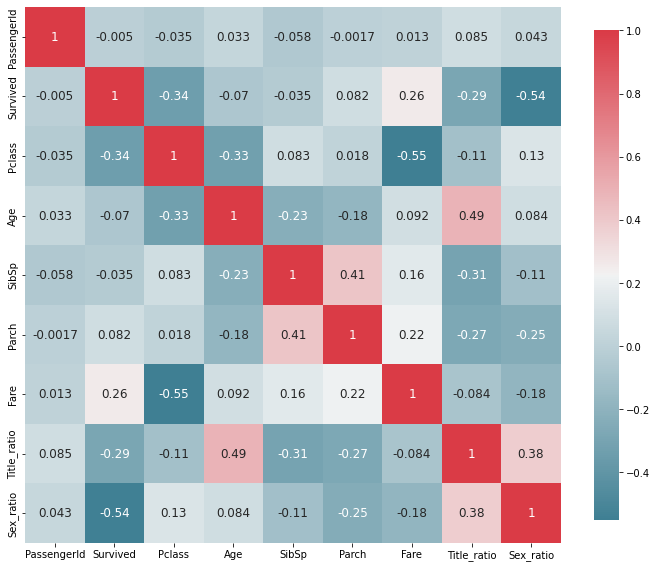

In [405]:
cf["Title_ratio"]= encoder.fit_transform(cf["Title"])
plot_correlation_map(cf)

In [350]:
## we notice that the survival rate for Title ratio has jumped from 0.19 to 0.29

In [361]:
cf["FamilySize"] = df["Parch"] + df["SibSp"]
cf

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Title_ratio,Sex_ratio,FamilySize
0,0,2,1,28.0,13.0000,S,Mrs,2,1,0
1,0,3,1,25.0,7.6500,S,Mrs,2,1,0
2,0,3,1,20.0,7.8542,S,Mrs,2,1,0
3,0,3,0,29.0,21.0750,S,Mrs,2,0,4
4,0,1,1,31.0,52.0000,S,Mrs,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,30.0708,C,Mrs,2,0,1
887,0,3,1,22.0,7.2292,C,Mrs,2,1,0
888,0,3,0,30.0,8.6625,S,Miss,1,0,0
889,0,3,1,NaN,7.8958,S,Mrs,2,1,0


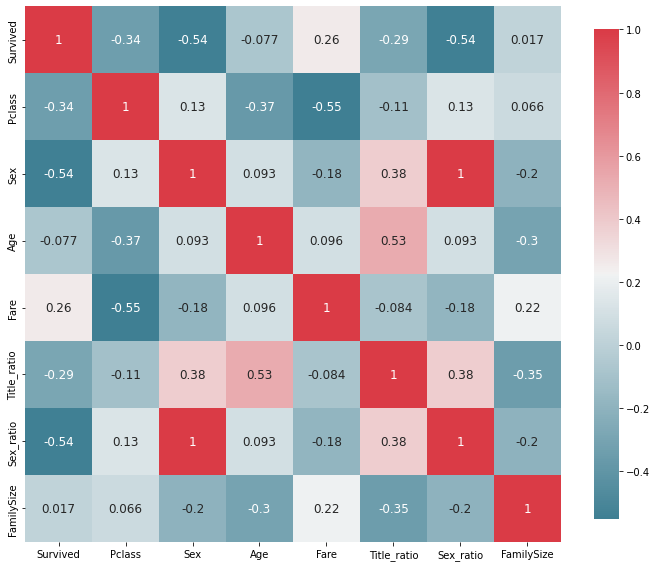

In [365]:
cf.drop(["Name"], axis=1, inplace=True, errors="ignore")
cf.drop(["Cabin"], axis=1, inplace=True, errors="ignore")
cf.drop(["PassengerId"], axis=1, inplace=True, errors="ignore")
cf.drop(["SibSp"], axis=1, inplace=True, errors="ignore")
cf.drop(["Parch"], axis=1, inplace=True, errors="ignore")
cf.drop(["Ticket"], axis=1, inplace=True, errors="ignore")

plot_correlation_map(cf)

In [ ]:
#The correlation between Survival and Familysize feature is close to 0, which gives us a conclusion that its an
#uselss feature.